In [7]:
import pandas as pd
import numpy as np
import mne
import glob
from tqdm import tqdm
 
from EegHelper.EegData import EegDataPoint, EegDataset, files_to_datapoints_imagenet
from EegHelper.DataIO import DataBuilder, split_main_data
import matplotlib.pyplot as plt

%matplotlib inline

#Following two are so that external files are auto loaded after edit
%load_ext autoreload
%autoreload 2
#mne outputs so much stuff, so just set log level
mne.set_log_level('error')

In [8]:
"""
This block explores the distribution of different classes. It has been found that if we only use classes with >= 20
samples, we will be classifying 476 classes and have 12442 samples.
"""

files = glob.glob('./MindBigData-Imagenet-IN/MindBigData-Imagenet/*.csv')
labels = {}

for file in files:
    label = file.split('_')[3]
    if label not in labels:
        labels[label] = 0
    labels[label] += 1

classes = 0
samples = 0

for item in labels.items():
    if item[1] >= 20:
        classes += 1
        samples += item[1]

print(classes, samples)

476 12442


In [9]:
files = glob.glob('./MindBigData-Imagenet-IN/MindBigData-Imagenet/*.csv')
all_points, all_labels = files_to_datapoints_imagenet(files=files, first_n=len(files))
print(len(all_points))

100%|██████████| 14012/14012 [01:28<00:00, 157.64it/s]

12441


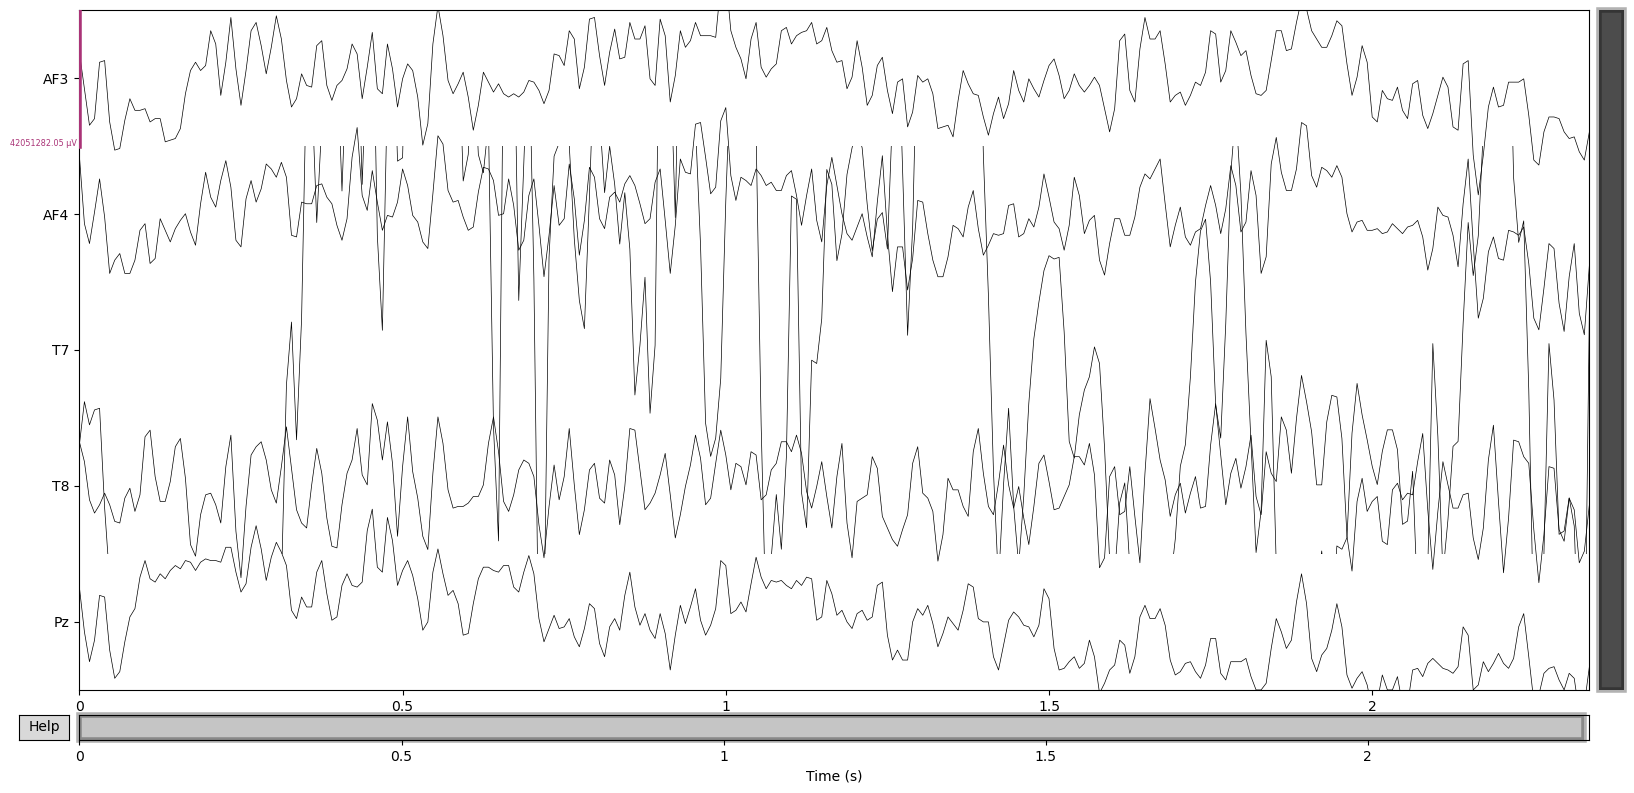

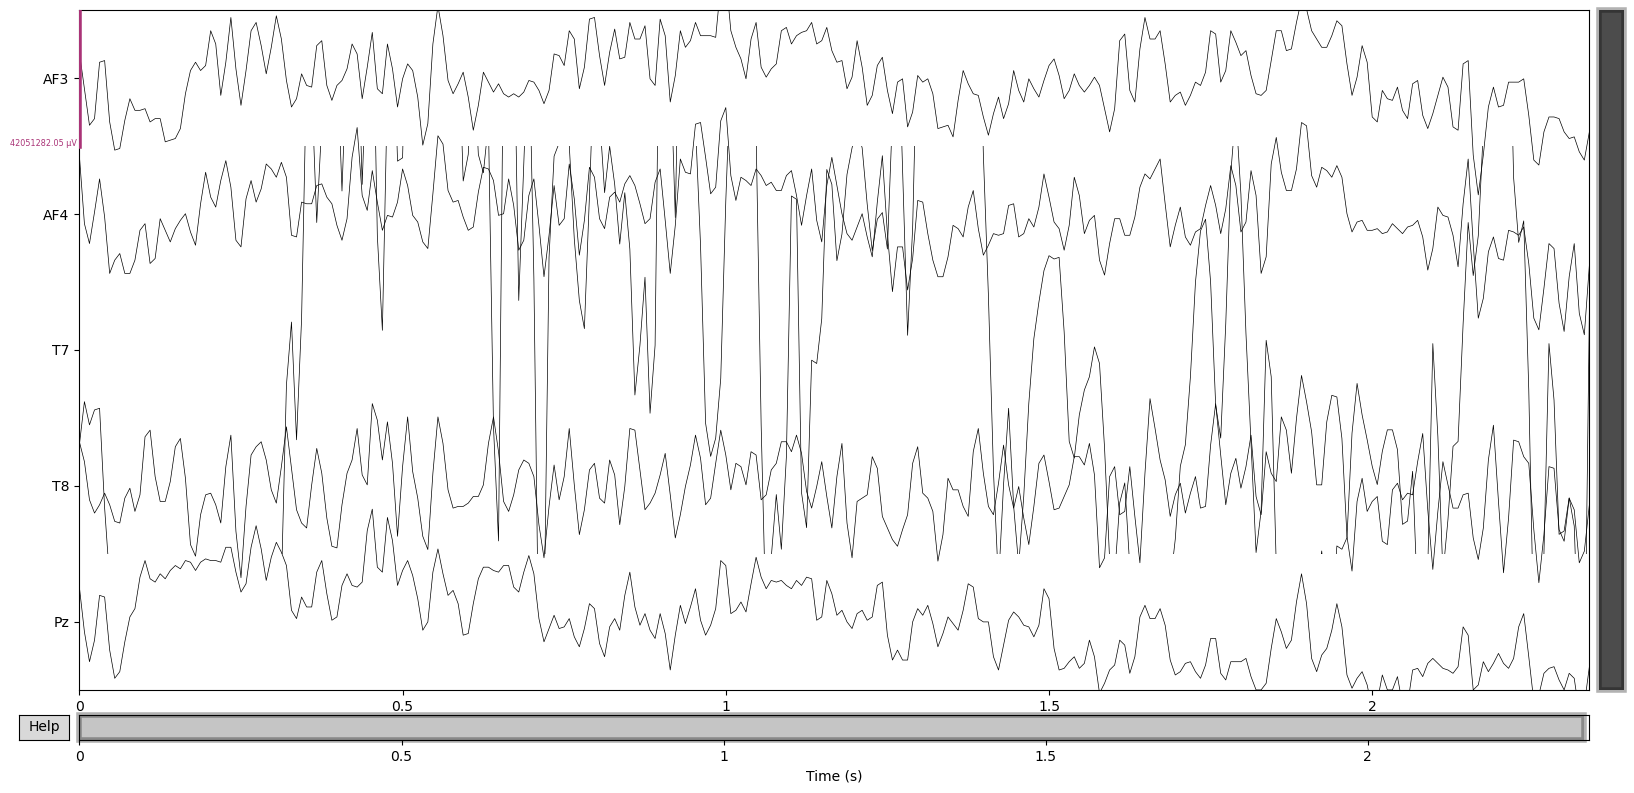

In [10]:
all_points[0].mne_object.plot(scalings='auto')

In [11]:
report = './MindBigData-Imagenet-IN/WordReport-v1.04.txt'

id_mapping = {}

with open(report) as file:
    for line in file:
        name = line.split()[0]
        id = line.split()[2]
        id_mapping[id] = name

print(id_mapping)

{'n02121808': 'cat', 'n01744401': 'snake', 'n02085620': 'dog', 'n03372029': 'instrument', 'n02120505': 'fox', 'n02804414': 'crib', 'n02492035': 'primate', 'n03710721': 'tanksuit', 'n02106382': 'dog', 'n02086910': 'dog', 'n01817953': 'bird', 'n02107574': 'dog', 'n04252077': 'snowmobile', 'n04254680': 'sport', 'n08518171': 'camping', 'n02687992': 'plane', 'n02445715': 'skunk', 'n02106166': 'dog', 'n02880940': 'bowl', 'n02097658': 'dog', 'n04468005': 'train', 'n02276258': 'admiral', 'n04515003': 'instrument', 'n03662601': 'lifeboat', 'n02108915': 'dog', 'n01662784': 'turtle', 'n02118333': 'fox', 'n02107683': 'dog', 'n02011460': 'bird', 'n03770439': 'miniskirt', 'n02493509': 'primate', 'n03481172': 'hammer', 'n02012849': 'bird', 'n04530566': 'boat', 'n04099969': 'chair', 'n02096437': 'dog', 'n02085782': 'dog', 'n04252225': 'snowplow', 'n10148035': 'wedding', 'n03445777': 'sport', 'n02062744': 'whale', 'n03673027': 'boat', 'n03001627': 'chair', 'n02107312': 'dog', 'n02110958': 'dog', 'n0210

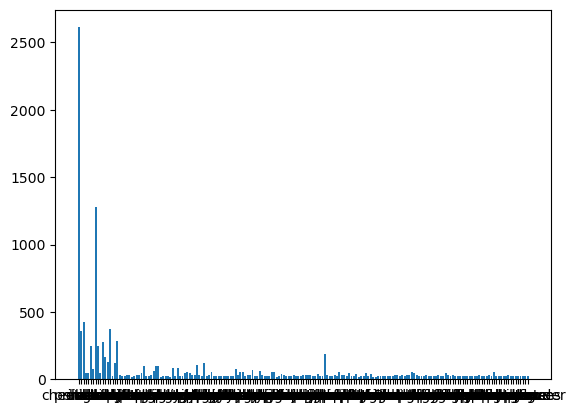

['tick', 'cheeseburger', 'boat', 'helmet', 'vehicle', 'bench', 'lizard', 'turtle', 'bike', 'bedroom', 'cat', 'sport', 'dumbbell', 'ladybug', 'ant', 'office', 'hamster', 'purse', 'lion', 'isopod', 'cows', 'fox', 'dishwasher', 'cup', 'stoplight', 'squirrel', 'rabbit', 'computer', 'tanksuit', 'ram', 'stingray', 'bowl', 'pencilsharpener', 'horse', 'zoo', 'unicycle', 'whale', 'apple', 'wedding', 'hometheater', 'cradle', 'frog', 'couch', 'tapeplayer', 'butterfly', 'ski', 'kite', 'camel', 'bell', 'canopener', 'refrigerator', 'remote', 'ladle', 'lipstick', 'hotdog', 'porcupine', 'winebottle', 'deer', 'scorpion', 'billiard', 'lobster', 'eraser', 'ray', 'pineapple', 'sheep', 'concert', 'mushroom', 'mug', 'jellyfish', 'monitor', 'toaster', 'plane', 'chair', 'display', 'strawberry', 'diver', 'warthog', 'swine', 'pitcher', 'camping', 'screwdriver', 'sunscreen', 'lifeboat', 'gondola', 'taxi', 'milkcan', 'tie', 'burrito', 'reptile', 'cart', 'pepper', 'antelope', 'restaurant', 'bear', 'armadillo', 'lo

In [24]:
dist = {}
for point in all_points:
    if point.label not in dist:
        dist[point.label] = 0
    dist[point.label] += 1

plt.bar(list(dist.keys()), list(dist.values()))
plt.show()

keys=[]
for item in dist.items():
    if 300 > item[1] > 20:
        keys.append(item[0])

print(keys)